# **Read data process**

In [1]:
import pandas as pd

In [2]:
# Read data from train.csv
train_data = pd.read_csv('train.csv')
train_data = train_data.drop(columns=['split'])
train_data = train_data.drop(columns=['Unnamed: 0'])
train_data = train_data.drop(columns=['Message ID'])

# Display 5 first rows of the dataframe
train_data.head(5)

,Subject,Message,Spam/Ham
0,christmas tree farm pictures,NaN,ham
1,"vastar resources , inc .","gary , production from the high island larger ...",ham
2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham
3,re : issue,fyi - see note below - already done .\nstella\...,ham
4,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",ham


In [3]:
# Read data from val.csv
val_data = pd.read_csv('val.csv')
val_data = val_data.drop(columns=['split'])
val_data = val_data.drop(columns=['Unnamed: 0'])
val_data = val_data.drop(columns=['Message ID'])

# Display 5 first rows of the dataframe
val_data.head(5)

,Subject,Message,Spam/Ham
0,miscellaneous,- - - - - - - - - - - - - - - - - - - - - - fo...,ham
1,re : purge of old contract _ event _ status,fyi - what do you all think ?\n- - - - - - - -...,ham
2,valero 8018 and 1394,it is my understanding the outages valero incu...,ham
3,01 / 00 natural gas nomination,enron methanol company nominates the following...,ham
4,re : misc . questions,- - - - - - - - - - - - - - - - - - - - - - fo...,ham


# **Baseline**

In [4]:
train_data_bl = train_data.copy()

train_data_bl['Subject'] = train_data_bl['Subject'].fillna('')
train_data_bl['Message'] = train_data_bl['Message'].fillna('')

val_data_bl = val_data.copy()

val_data_bl['Subject'] = val_data_bl['Subject'].fillna('')
val_data_bl['Message'] = val_data_bl['Message'].fillna('')

train_data_bl['text'] = train_data_bl['Subject'] + ' ' + train_data_bl['Message']
val_data_bl['text'] = val_data_bl['Subject'] + ' ' + val_data_bl['Message']

In [5]:
train_data_bl.head(5)

,Subject,Message,Spam/Ham,text
0,christmas tree farm pictures,,ham,christmas tree farm pictures
1,"vastar resources , inc .","gary , production from the high island larger ...",ham,"vastar resources , inc . gary , production fro..."
2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,calpine daily gas nomination - calpine daily g...
3,re : issue,fyi - see note below - already done .\nstella\...,ham,re : issue fyi - see note below - already done...
4,mcmullen gas for 11 / 99,"jackie ,\nsince the inlet to 3 river plant is ...",ham,"mcmullen gas for 11 / 99 jackie ,\nsince the i..."


In [6]:
val_data_bl.head(5)

,Subject,Message,Spam/Ham,text
0,miscellaneous,- - - - - - - - - - - - - - - - - - - - - - fo...,ham,miscellaneous - - - - - - - - - - - - - - - - ...
1,re : purge of old contract _ event _ status,fyi - what do you all think ?\n- - - - - - - -...,ham,re : purge of old contract _ event _ status fy...
2,valero 8018 and 1394,it is my understanding the outages valero incu...,ham,valero 8018 and 1394 it is my understanding th...
3,01 / 00 natural gas nomination,enron methanol company nominates the following...,ham,01 / 00 natural gas nomination enron methanol ...
4,re : misc . questions,- - - - - - - - - - - - - - - - - - - - - - fo...,ham,re : misc . questions - - - - - - - - - - - - ...


## **MultinomialNB**

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize the text data
vectorizer = CountVectorizer()  
X_train = vectorizer.fit_transform(train_data_bl['text'])  # Fit on train data
X_val = vectorizer.transform(val_data_bl['text'])          # Transform validation data

In [8]:
# Prepare the labels (Assuming 'Spam/Ham' column contains labels, where 1 = Spam, 0 = Ham)
y_train = train_data_bl['Spam/Ham'].map({'spam': 1, 'ham': 0})
y_val = val_data_bl['Spam/Ham'].map({'spam': 1, 'ham': 0})

In [9]:
# Train a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

mul_NB = MultinomialNB()
mul_NB.fit(X_train, y_train)

MultinomialNB()

In [10]:
# Predict on the validation set
y_pred = mul_NB.predict(X_val)

In [11]:
# Evaluate the model
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy = accuracy_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1: {f1:.4f}')

Accuracy: 0.9890
Recall: 0.9904
Precision: 0.9879
F1: 0.9891


In [12]:
# Save the model
import joblib

joblib.dump(mul_NB, 'model.joblib')
joblib.dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']

# **Pre-process data phase**

In [13]:
import re
import nltk

from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\as\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\as\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
# Function to clean the text
def clean_regex(m):
    m = re.sub(r'\\r\\n', ' ', m) # remove newline characters
    m = re.sub(r'\W', ' ', m) # remove non-alphabets
    m = re.sub(r'\s+', ' ', m, flags=re.I) # remove multiple spaces
    m = re.sub(r'^b\s+', '', m) 
    m = m.lower() # lower case
    return m

# Function to clean the column
def clean_column(data, col_name):
    # remove email addresses, URLs, numbers, non-alphabets, punctuations, multiple spaces, and lower case
    data[col_name] = data[col_name].apply(clean_regex)

    # remove stopwords
    data[col_name]= data[col_name].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))

    # remove words with length less than 3 and more than 15 characters to remove noise
    data[col_name]= data[col_name].apply(lambda x: ' '.join([item for item in x.split() if 3 <= len(item) <= 15]))

    # lemmatization
    lem = WordNetLemmatizer()

    # lemmatize the words into verb form
    data[col_name] = data[col_name].apply(lambda x: ' '.join([lem.lemmatize(word,pos='v') for word in x.split()]))
    # lemmatize the words into noun form
    data[col_name] = data[col_name].apply(lambda x: ' '.join([lem.lemmatize(word,pos='n') for word in x.split()]))

    return data


In [15]:
# Pre-process the data
def pre_process(data):
    data = clean_column(data, 'Message')
    data = clean_column(data, 'Subject')
    return data

# pre-process train data
train_data['Subject'] = train_data['Subject'].fillna('')
train_data['Message'] = train_data['Message'].fillna('')

train_data = pre_process(train_data)

train_data['text'] = train_data['Subject'] + ' ' + train_data['Message']

# pre-process validation data
val_data['Subject'] = val_data['Subject'].fillna('')
val_data['Message'] = val_data['Message'].fillna('')

val_data = pre_process(val_data)

val_data['text'] = val_data['Subject'] + ' ' + val_data['Message']

In [16]:
train_data.head(7)

,Subject,Message,Spam/Ham,text
0,christmas tree farm picture,,ham,christmas tree farm picture
1,vastar resource inc,gary production high island larger block comme...,ham,vastar resource inc gary production high islan...
2,calpine daily gas nomination,calpine daily gas nomination doc,ham,calpine daily gas nomination calpine daily gas...
3,issue,fyi see note already do stella forward stella ...,ham,issue fyi see note already do stella forward s...
4,mcmullen gas,jackie since inlet river plant shut last day f...,ham,mcmullen gas jackie since inlet river plant sh...
5,meter 1517 jan 1999,george need follow do jan zero 012 27049 001 r...,ham,meter 1517 jan 1999 george need follow do jan ...
6,dun number change,fyi forward gary payne hou ect antoine pierre ...,ham,dun number change fyi forward gary payne hou e...


In [17]:
val_data.head(7)

,Subject,Message,Spam/Ham,text
0,miscellaneous,forward ami chokshi corp enron dscottl com ami...,ham,miscellaneous forward ami chokshi corp enron d...
1,purge old contract event status,fyi think forward brenda herod hou ect dave no...,ham,purge old contract event status fyi think forw...
2,valero 8018 1394,understand outage valero incur location force ...,ham,valero 8018 1394 understand outage valero incu...
3,natural gas nomination,enron methanol company nominate follow require...,ham,natural gas nomination enron methanol company ...
4,misc question,forward ami chokshi corp enron dscottl com ami...,ham,misc question forward ami chokshi corp enron d...
5,noms,forward ami chokshi corp enron royal edmondson...,ham,noms forward ami chokshi corp enron royal edmo...
6,revision,huntsville woodland conroe 11500 day 000 big t...,ham,revision huntsville woodland conroe 11500 day ...


# **EDA**

In [18]:
# count the number of ham and spam emails

ham_count = train_data[train_data['Spam/Ham'] == 'ham'].shape[0]
spam_count = train_data[train_data['Spam/Ham'] == 'spam'].shape[0]

print('There are {} ham emails and {} spam emails'.format(ham_count, spam_count))

There are 13426 ham emails and 13858 spam emails


In [19]:
# count words in ham and spam emails
from collections import Counter

train_data['text'] = train_data['Subject'] + ' ' + train_data['Message']

ham_words = ' '.join(list(train_data[train_data['Spam/Ham'] == 'ham']['text'].astype(str)))
spam_words = ' '.join(list(train_data[train_data['Spam/Ham'] == 'spam']['text'].astype(str)))

ham_words = ham_words.split()
spam_words = spam_words.split() 

ham_word_freq = Counter(ham_words)
spam_word_freq = Counter(spam_words)


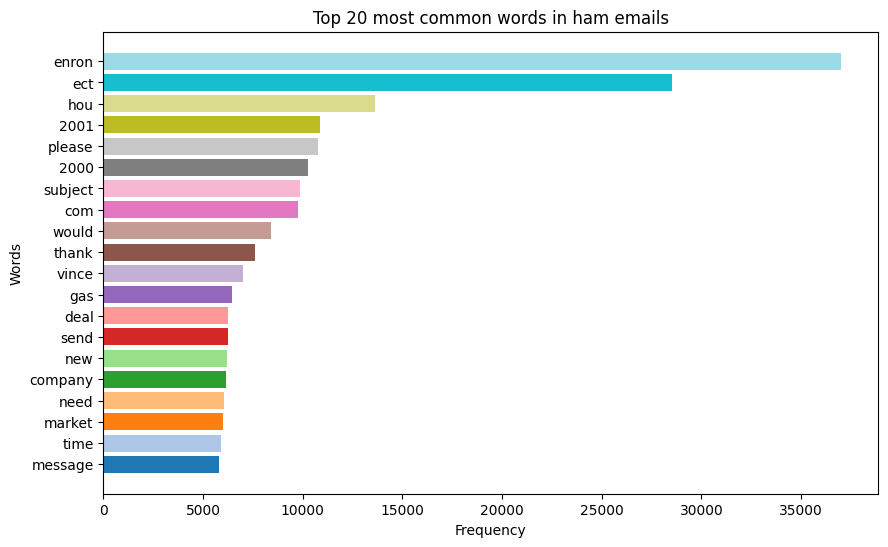

In [20]:
# Visualize the most common words in ham emails
import matplotlib.pyplot as plt
import numpy as np

ham_word_freq_df = pd.DataFrame(ham_word_freq.most_common(20), columns=['word', 'frequency'])
ham_word_freq_df = ham_word_freq_df.sort_values(by='frequency')

colors = plt.cm.tab20(np.linspace(0, 1, 20))

plt.figure(figsize=(10, 6))
plt.barh(ham_word_freq_df['word'], ham_word_freq_df['frequency'], color=colors)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 most common words in ham emails')
plt.show()


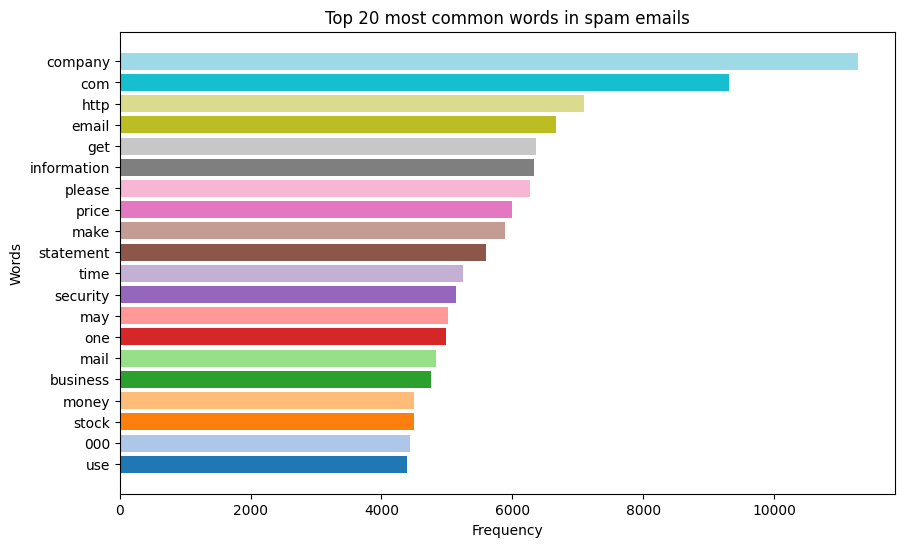

In [21]:
# Visualize the most common words in spam emails

spam_word_freq_df = pd.DataFrame(spam_word_freq.most_common(20), columns=['word', 'frequency'])
spam_word_freq_df = spam_word_freq_df.sort_values(by='frequency')

colors = plt.cm.tab20(np.linspace(0, 1, 20))

plt.figure(figsize=(10, 6))
plt.barh(spam_word_freq_df['word'], spam_word_freq_df['frequency'], color=colors)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 most common words in spam emails')
plt.show()


## **Feature extraction**

In [22]:
# Feature extraction phase using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

X_train = tfidf_vectorizer.fit_transform(train_data['text'])
X_val = tfidf_vectorizer.transform(val_data['text'])

y_train = train_data['Spam/Ham'].map({'spam': 1, 'ham': 0})
y_val = val_data['Spam/Ham'].map({'spam': 1, 'ham': 0})


In [29]:
X_train.shape, X_val.shape

((27284, 124817), (3084, 124817))

# **Train**

In [23]:
# Train a Multinomial Naive Bayes model

multinomial_NB_update = MultinomialNB()

multinomial_NB_update.fit(X_train, y_train)

MultinomialNB()

In [24]:
y_pred = multinomial_NB_update.predict(X_val)

In [25]:
accuracy = accuracy_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'F1: {f1:.4f}')

Accuracy: 0.9887
Recall: 0.9904
Precision: 0.9872
F1: 0.9888
